In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading and Saving Images

In [56]:
# Accessing and Modifying pixel values
# loads an image
image = cv2.imread('../img/coding.png') # OpenCV reads images in as B, G, R 
image = np.flip(image, axis = 2) # to Re-order channels as R, G, B for matplotlib renderer
# It returns a tuple of number of rows, columns and channels (if image is color)
image.shape

(344, 640, 3)

In [57]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

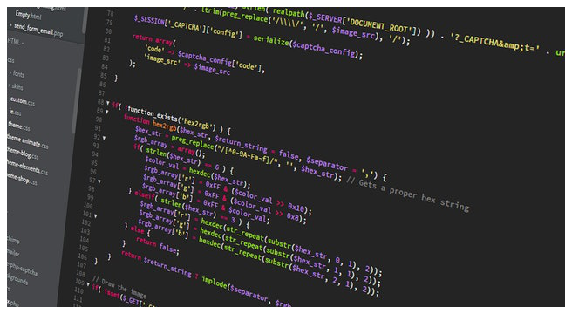

In [59]:
show_image(image)

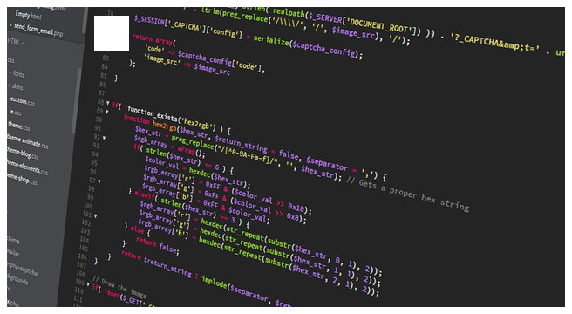

In [60]:
# accessing image section and converting it to white
image[10:50, 100:140] = [255, 255, 255]
show_image(image)

In [62]:
cv2.imwrite('edited.png', np.flip(image, axis = 2)) # Remember OpenCV operations expect images to be in the format # B, G, R

True

In [ ]:
# TODO: What happens if we don't flip the image channels before saving it with cv2.imwrite?

### EXERCISE 1: Load an image using CV2, draw a white rectangle on it then save it to disk using CV2

In [ ]:
# TODO: Write your code below

## 2. Colour Channels

### 2.1 Order of Colour Channels

In [7]:
shapes_image = "../img/shapes.png"

In [8]:
# reads image using matplotlib
shapes_matpotlib = plt.imread(shapes_image)

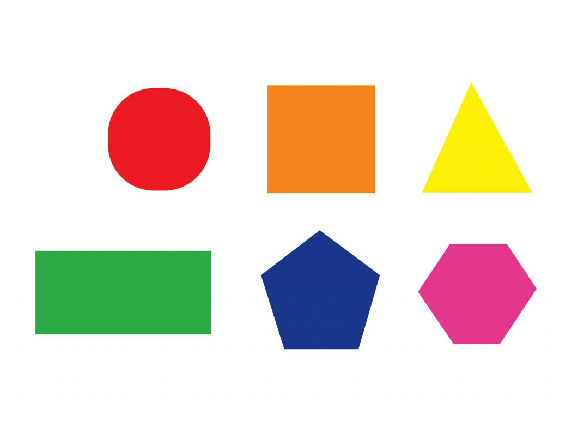

In [9]:
show_image(shapes_matpotlib)

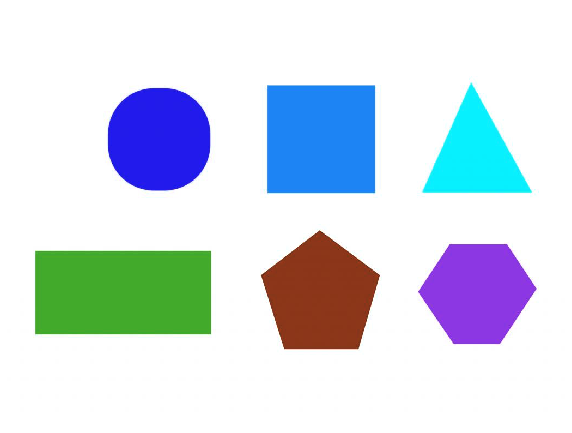

In [10]:
# The order of colour channels read in is important - Notice the colour changes
shapes_cv2 = cv2.imread(shapes_image)
show_image(shapes_cv2)

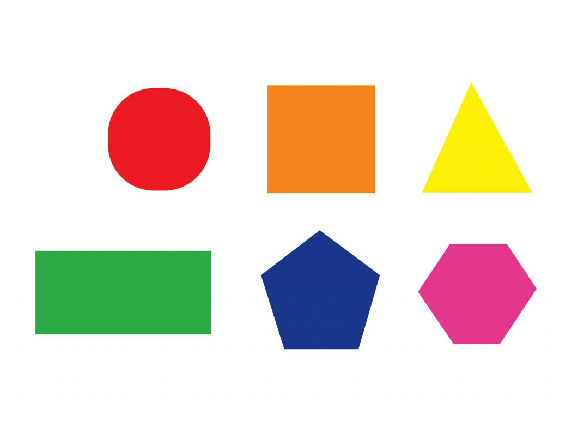

In [11]:
show_image(np.flip(shapes_cv2, axis = 2))

### 2.2 Flipping matrices with numpy

In [36]:
x = np.array([[[1,2, 3], [2, 3, 4], [3, 4, 5]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 6]], 
                  [[1,2, 3], [2, 3, 4], [3, 4, 7]]])
x

array([[[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 6]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 7]]])

In [17]:
np.flip(x, axis =0 )

array([[[1, 2, 3],
        [2, 3, 4],
        [3, 4, 7]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 6]],

       [[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]])

In [37]:
np.flip(x, axis =1 )

array([[[3, 4, 5],
        [2, 3, 4],
        [1, 2, 3]],

       [[3, 4, 6],
        [2, 3, 4],
        [1, 2, 3]],

       [[3, 4, 7],
        [2, 3, 4],
        [1, 2, 3]]])

In [38]:
np.flip(x, axis =2 )

array([[[3, 2, 1],
        [4, 3, 2],
        [5, 4, 3]],

       [[3, 2, 1],
        [4, 3, 2],
        [6, 4, 3]],

       [[3, 2, 1],
        [4, 3, 2],
        [7, 4, 3]]])

### 2.3 Splitting colour channels with matplotlib

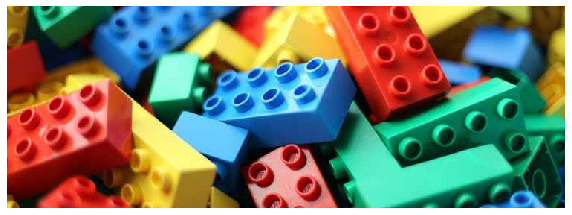

Red


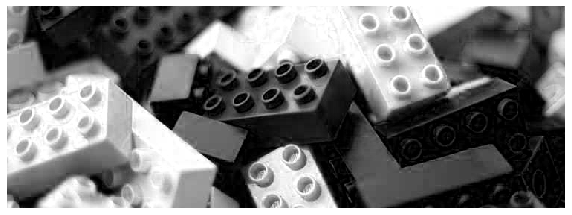

Green


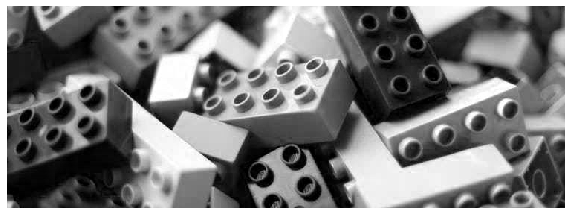

Blue


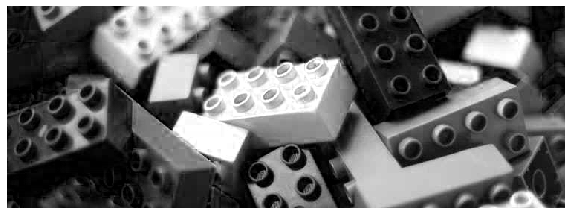

In [18]:
image = plt.imread('../img/lego.jpg')
show_image(image)
channels_matplotlib = [image[:, : , i] for i in range(3)]
names = ['Red', 'Green', 'Blue']
for name, channel in zip(names, channels_matplotlib):
    print(name)
    show_image(channel, cmap='gray')

### 2.4 Splitting colour channels with CV2

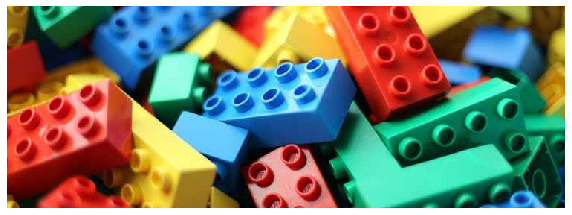

Red


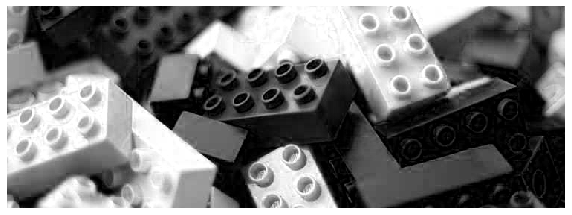

Green


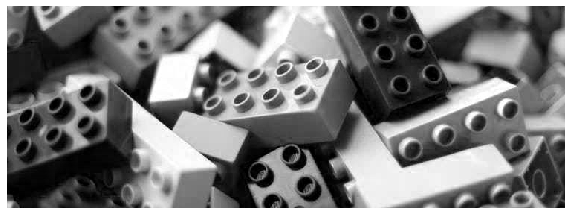

Blue


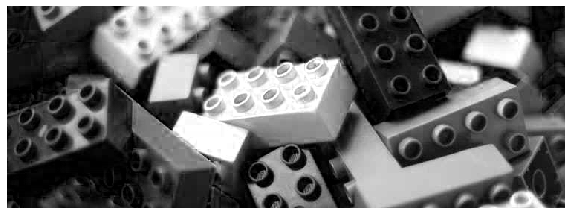

In [39]:
image = cv2.imread('../img/lego.jpg') # B, G, R -> this order is required for showing images with cv2.imshow().
image = np.flip(image, axis = 2) # R, G, B -> This order is required for showing images with plt.imshow().
show_image(image)
cv2_channels = cv2.split(image)
for name, channel in zip(names, cv2_channels):
    print(name)
    show_image(channel, cmap='gray')

### Homework 1: Write a function that reads in an image using either the matplotlib or CV2 and shows it in this notebook using matplotlib 

In [ ]:
# TODO: Write your code below